 #

# Ma422 Project - Adult income dataset

#### Objective : The objective is to predict, according to some characteristics, if a person earns more than $50K per year or not


We import the librairies we need to read the datas and analyse it.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import warnings

warnings.filterwarnings('ignore')

We open and read the datas file.

In [2]:
df = pd.read_csv('src/datas/adult.csv')
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

## 1 - Quick dataset analysis

Now that the dataset is imported in the jupyter file, we can start exploring, digging in the datas to see what it is composed of, understand the variables in it, the possible links between them, find the target etc. This step is very important because it allows the user to understand the meaning of datasets, see if information has to be changed, or removed and also start thinking about how datas should be used with the future implemented model.

### A) Dataset cleaning and verifications



First, we check if there are repetitions of observations in the dataset. If yes, we erase them with the method `drop_duplicates` from `pandas` library.

In [3]:
df = df.drop_duplicates()
print(df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [4]:
# Remplace "?" by NaN
df.replace('?', np.nan, inplace=True)

Then, we remove them in order to have valid datas to send to the model.
We will use the method `isna` from `pandas` library to list the missing values.

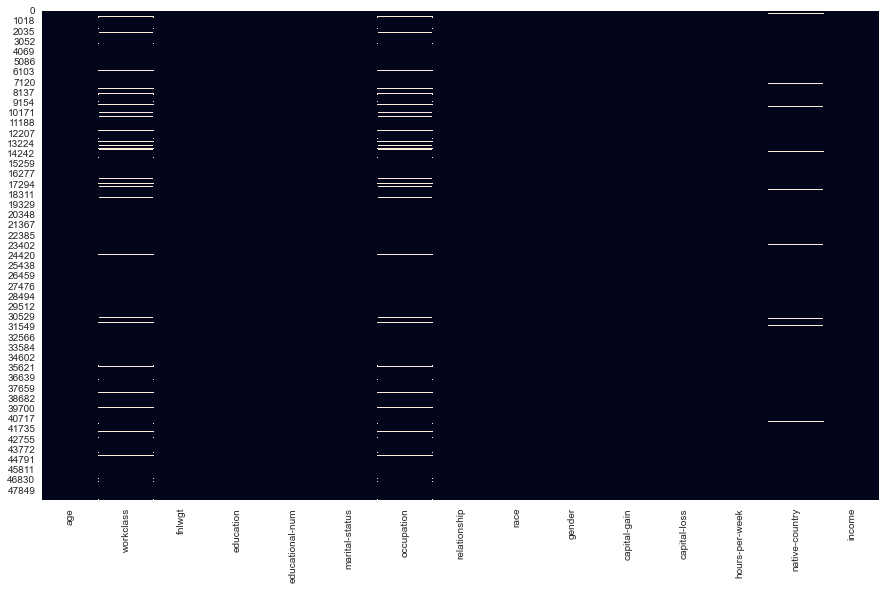

age                0.000000
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
income             0.000000
native-country     0.017545
workclass          0.057286
occupation         0.057491
dtype: float64


In [5]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.isna(), cbar=False)
plt.show()

percentageOfNaNValues = (df.isna().sum() / df.shape[0]).sort_values(ascending=True)

print(percentageOfNaNValues)  # Normalized values between O and 1

We use the method `dropna` to remove the lines containing at least one missing value.

In [6]:
# Removing the rows containing the missing values
df.dropna(inplace=True)
print(df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
5       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fi

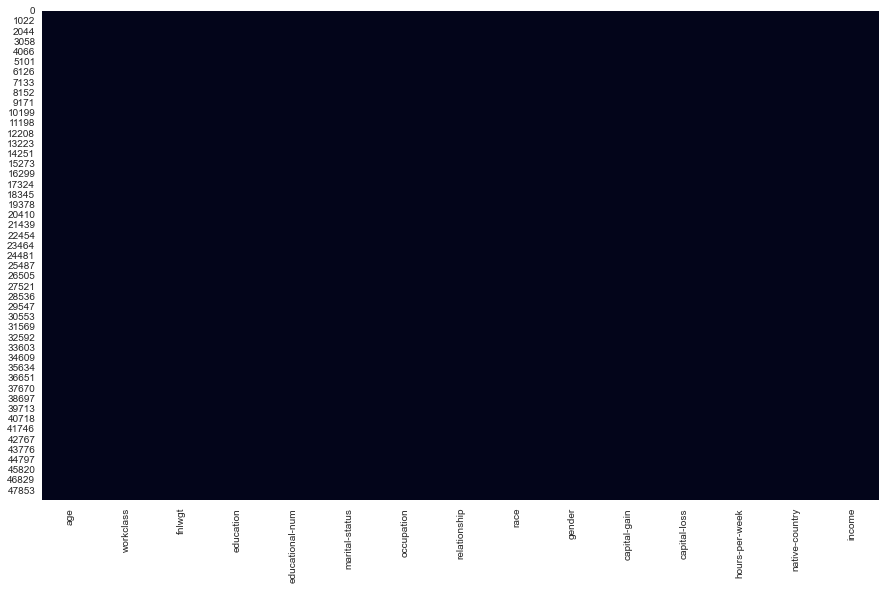

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64


In [7]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.isna(), cbar=False)
plt.show()

percentageOfNaNValues = (df.isna().sum() / df.shape[0]).sort_values(ascending=True)

print(percentageOfNaNValues)

### B) Analysis of the dataset

We can start by displaying some charcteristics in order to know the size of the dataset and what's inside.

In [8]:
columnNames = df.columns
datasetShape = df.shape
variablesTypes = df.dtypes
variablesTypesCount = df.dtypes.value_counts()

print('Column names :', columnNames, '\n')
print('Dataset Shape :', datasetShape, '\n')
print('Variables Types :', variablesTypes, '\n')
print('Variables Types Count :', variablesTypesCount)

Column names : Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object') 

Dataset Shape : (45175, 15) 

Variables Types : age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object 

Variables Types Count : object    9
int64     6
dtype: int64


### C) Analysis of the target variable

Repartition of the target :
 <=50K    33973
>50K     11202
Name: income, dtype: int64

Type of this variable: object


<AxesSubplot:ylabel='income'>

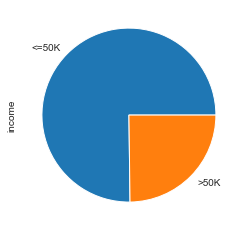

In [9]:
count_target = df['income'].value_counts()
target_type = df['income'].dtype

print('Repartition of the target :\n', count_target)
print('\nType of this variable:', target_type)
count_target.plot.pie()

## 2 - Pre-processing

In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

First, we reduce the size of the dataset in order to avoid high CPU usage and high cumpoutation time. We could take for instance 10000 observations for our study.

In [11]:
# Reducing the size of the dataset
df = df.head(10000)
df_copy = df.copy()
print(df.shape)

(10000, 15)


Encoding the data

In [12]:
# LabelEncoding
encoder = preprocessing.LabelEncoder()
features = ['workclass', 'education', 'occupation', 'race', 'gender', 'native-country', 'income','marital-status','relationship']
df[features] = df[features].apply(encoder.fit_transform)
print(df)

       age  workclass  fnlwgt  education  educational-num  marital-status  \
0       25          2  226802          1                7               4   
1       38          2   89814         11                9               2   
2       28          1  336951          7               12               2   
3       44          2  160323         15               10               2   
5       34          2  198693          0                6               4   
...    ...        ...     ...        ...              ...             ...   
10815   30          2  272432         11                9               4   
10816   30          5  182271         11                9               0   
10817   50          2  193746         11                9               2   
10818   49          4  203505         11                9               0   
10819   41          2  118484         15               10               5   

       occupation  relationship  race  gender  capital-gain  capital-loss  

We will create a dictionnary that will store the encoded value of the original values. It could be useful if we want to do predictions on new observations, to encode the new raw datas.

In [13]:
# Build a dico with original values as key and their encoded values as value (WITH THE REDUCED DATAFRAME)
numerical_variables = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt']
categorical_variables = ['workclass', 'education', 'occupation', 'race', 'gender', 'native-country', 'income','marital-status','relationship']
dicoEncoding = {}

for varOri, varEnc in itertools.zip_longest(df_copy, df, fillvalue=''):  # Iterate in the original dataset and the encoded one
    # Looking for the categorical variables
    if (varOri == varEnc) and (varOri in categorical_variables) and (varEnc in categorical_variables):
        dicoVar = {}  # Create a dictionary to store all combinations
        for elem1, elem2 in itertools.zip_longest(df_copy[varOri], df[varEnc], fillvalue=''):  # Iterate in columns of the original and encoded datasets
            dicoVar[elem1] = elem2  # Assign the encoded value corresponding to the original value
        dicoEncoding[varOri] = dicoVar  # Store the dictionary (columns) in the general dictionary

    # Looking for the numerical variables
    if (varOri == varEnc) and (varOri in numerical_variables) and (varEnc in numerical_variables):
        dicoVar = {}
        for elem1, elem2 in itertools.zip_longest(df_copy[varOri], df[varEnc], fillvalue=''):
            dicoVar[elem1] = elem2
        dicoEncoding[varOri] = dicoVar

#print(dicoEncoding)

Now, we can compute the correlation to see the correlations between the variables.

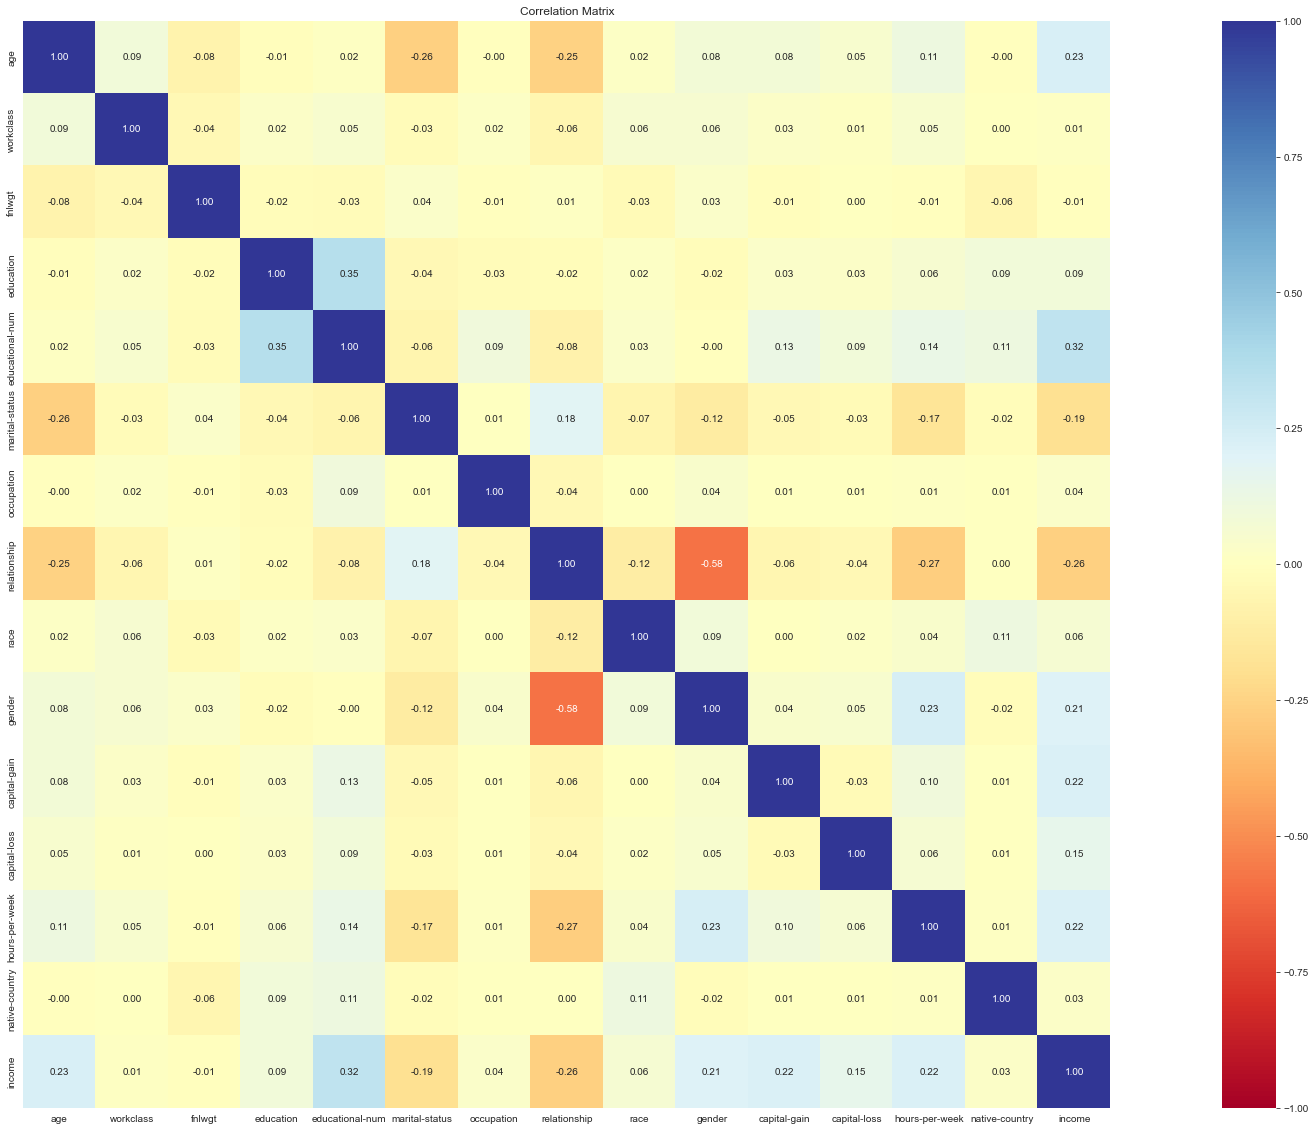

In [14]:
# Compute the correlation matrix
corr_mat = df.corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(40, 20))

# Create the heatmap
sns.heatmap(corr_mat, cmap='RdYlBu', annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, ax=ax)

# Set the title
ax.set_title('Correlation Matrix')

# Show the plot
plt.show()

After analyzing the correlation matrix, we can drop the useless features.

In [15]:
df = df.drop(['workclass','occupation','native-country','race', 'fnlwgt'], axis=1)
print(df)

       age  education  educational-num  marital-status  relationship  gender  \
0       25          1                7               4             3       1   
1       38         11                9               2             0       1   
2       28          7               12               2             0       1   
3       44         15               10               2             0       1   
5       34          0                6               4             1       1   
...    ...        ...              ...             ...           ...     ...   
10815   30         11                9               4             4       0   
10816   30         11                9               0             1       1   
10817   50         11                9               2             0       1   
10818   49         11                9               0             1       0   
10819   41         15               10               5             1       1   

       capital-gain  capital-loss  hour

We can finally build the matrices X and y and the train / test sets

In [16]:
X = df.drop(['income'], axis=1)
y = df['income']

print(X)
print(y)

# Samples for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
print(X_train.shape)
print(X_test.shape)

       age  education  educational-num  marital-status  relationship  gender  \
0       25          1                7               4             3       1   
1       38         11                9               2             0       1   
2       28          7               12               2             0       1   
3       44         15               10               2             0       1   
5       34          0                6               4             1       1   
...    ...        ...              ...             ...           ...     ...   
10815   30         11                9               4             4       0   
10816   30         11                9               0             1       1   
10817   50         11                9               2             0       1   
10818   49         11                9               0             1       0   
10819   41         15               10               5             1       1   

       capital-gain  capital-loss  hour

## 3 - Ensemble learning methods

### A) Bagging

In [17]:
from collections import Counter
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

We can try several methods and compare their performances.


Bagging method from scratch.

In [18]:
def BaggingScratch(X_train, y_train, X_test, base_estimator, n_estimators=100):
    y_pred = np.zeros((X_test.shape[0],
                       n_estimators))  # Initialization of the array which will store all the predictions for n estimators

    for i in range(n_estimators):
        num = np.random.choice(X_train.index.values, size=X_train.shape[0], replace=True)  # Resample with replacement
        X_bstr = X_train.loc[num]  # Access to the row which has index num
        y_bstr = y_train.loc[num]  # Access to the column which has index num
        base_estimator.fit(X_bstr, y_bstr)  # Fitting with a base_estimator
        y_pred[:, i] = base_estimator.predict(X_test)  # Writing the predictions results in y_pred array

    # Aggregate the predictions using majority voting
    y_pred_majority = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        y_pred_i = y_pred[i, :]
        c = Counter(y_pred_i)  # Read all the values in y_pred_i
        y_pred_majority[i] = c.most_common(1)[0][
            0]  # Getting the most common element and its count (passing 1 as argument and [0][0] to get the most common element)

    return y_pred_majority


knn = KNeighborsClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
y_pred_knn = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=knn)
y_pred_lr = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=lr)
y_pred_dtc = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=dtc)
# number of estimators is set to 100 by default

accuracyScratch_KNN = accuracy_score(y_test, y_pred_knn)
accuracyScratch_LR = accuracy_score(y_test, y_pred_lr)
accuracyScratch_DTC = accuracy_score(y_test, y_pred_dtc)
print('Accuracy for Bagging from Scratch with KNN :', accuracyScratch_KNN)
print('Accuracy for Bagging from Scratch with LR :', accuracyScratch_LR)
print('Accuracy for Bagging from Scratch with DTC :', accuracyScratch_DTC)

Accuracy for Bagging from Scratch with KNN : 0.8283333333333334
Accuracy for Bagging from Scratch with LR : 0.7956666666666666
Accuracy for Bagging from Scratch with DTC : 0.8256666666666667


Bagging method using scikit-learn.

- We, first, try the method with the KNN estimator, as it is a widely used supervised learning method.

In [19]:
# Bagging KNN
# Defining different values of n_estimators to try
n_estimators = [10, 20, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [KNeighborsClassifier()]}

# Performing Grid Search to find the best value of n_estimators for the bagging classifier
model1_KNN_bag = GridSearchCV(BaggingClassifier(), param_grid=param_grid)
model1_KNN_bag.fit(X_train, y_train)
model1_KNN_bag.predict(X_test)
accuracy1 = model1_KNN_bag.score(X_test, y_test)

print("Bagging KNN")
print("Best value of n_estimators:", model1_KNN_bag.best_params_['n_estimators'])
print("Accuracy for bagging with KNN:", accuracy1)

Bagging KNN
Best value of n_estimators: 10
Accuracy for bagging with KNN: 0.8246666666666667


We can compare with the single method to see the results between the ensemble method and the single method used as estimator.

In [20]:
# Single KNN
# Defining different values of n_neighbors to try
n_neighbors = [i for i in range(1, 27, 2)]

# loop over different values of n_neighbors and evaluate the score to select the hyperparameters with high score
best_score = 0
best_k = 0
for k in n_neighbors:
    # For each value of n_neighbors, we execute a model prediction and look at its accuracy.
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    model.predict(X_test)
    score = model.score(X_test, y_test)
    if score > best_score:  # The parameters with the best accuracy are stored into variables
        best_score = score
        best_k = k

model2_KNN = KNeighborsClassifier(n_neighbors=best_k)
model2_KNN.fit(X_train, y_train)
model2_KNN.predict(X_test)
accuracy2 = model2_KNN.score(X_test, y_test)

print("\nSingle KNN")
print("Best value of k:", best_k)
print("Accuracy with single KNN:", accuracy2)


Single KNN
Best value of k: 21
Accuracy with single KNN: 0.828


In [21]:
if (accuracy1 > accuracy2):
    print('\nThe bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))


The single method has a better accuracy than the bagging method.
The difference of accuracies between the single method and the bagging is : 0.0033333333333332993


- We try the bagging method with another estimator : Logistic Regression

In [22]:
# Bagging Logistic Regression
# Defining different values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [LogisticRegression()]}

model1_LR_bag = GridSearchCV(BaggingClassifier(),
                         param_grid=param_grid)  # Performing Grid Search to find the best parameters for the Bagging Classifier
model1_LR_bag.fit(X_train, y_train)
model1_LR_bag.predict(X_test)
accuracy1 = model1_LR_bag.score(X_test, y_test)

print("Bagging LR")
print("Best value of n_estimators for Logistic Regression:", model1_LR_bag.best_params_['n_estimators'])
print("Accuracy for bagging with Logistic Regression:", accuracy1)

Bagging LR
Best value of n_estimators for Logistic Regression: 10
Accuracy for bagging with Logistic Regression: 0.7953333333333333


We compare the bagging method with LR estimator with the single LR method

In [23]:
# Single Logistic Regression
# Defining the parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

model2_LR = GridSearchCV(LogisticRegression(),
                         param_grid=param_grid)  # Performing Grid Search to find the best parameters for Logistic Regression
model2_LR.fit(X_train, y_train)
model2_LR.predict(X_test)
accuracy2 = model2_LR.score(X_test, y_test)

print("\nSingle LR")
print("Best parameters:", model2_LR.best_params_)
print("Accuracy for Logistic Regression:", accuracy2)



Single LR
Best parameters: {'C': 100, 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.817


In [24]:
if (accuracy1 > accuracy2):
    print('\nThe bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))


The single method has a better accuracy than the bagging method.
The difference of accuracies between the single method and the bagging is : 0.021666666666666612


- We can test the ensemble method on a last estimator which is the Decision Tree Classifier (DTC) which is the method used by default on most of ensemble learning methods.

In [25]:
# Bagging Decision Tree Classifier (default method on Scikit-Learn)
# Defining different values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [DecisionTreeClassifier()]}

model1_DTC_bag = GridSearchCV(BaggingClassifier(),
                          param_grid=param_grid)  # Performing Grid Search to find the best parameters for the Bagging Classifier
model1_DTC_bag.fit(X_train, y_train)
model1_DTC_bag.predict(X_test)
accuracy1 = model1_DTC_bag.score(X_test, y_test)

print("Bagging DTC")
print("Best value of n_estimators for Decision Tree Classifier:", model1_DTC_bag.best_params_['n_estimators'])
print("Accuracy for bagging with Decision Tree Classifier:", accuracy1)

Bagging DTC
Best value of n_estimators for Decision Tree Classifier: 200
Accuracy for bagging with Decision Tree Classifier: 0.8243333333333334


Let's compare the result of the bagging with DTC method and the single DTC method:

In [26]:
# Single Decision Tree classifier
model2_DTC = DecisionTreeClassifier()
model2_DTC.fit(X_train, y_train)
model2_DTC.predict(X_test)
accuracy2 = model2_DTC.score(X_test, y_test)

print("\nSingle DTC")
print("Accuracy for Decision Tree Classifier:", accuracy2)


Single DTC
Accuracy for Decision Tree Classifier: 0.812


In [27]:
if (accuracy1 > accuracy2):
    print('\nThe bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))


The bagging method has a better accuracy than the single method.
The difference of accuracies between the single method and the bagging is : 0.012333333333333307


Making predictions on a new observation ...

In [28]:
features_name = ['age', 'education', 'educational-num', 'marital-status', 'relationship', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week']
newPerson_df = pd.DataFrame(data=[[45, 'Masters', 14, 'Married-civ-spouse', 'Husband', 'Male', 0, 0, 50]], columns=features_name)
#newPerson_df = pd.DataFrame(data=[[35, 'Masters', 14, 'Separated', 'Not-in-family', 'Male', 0, 0, 50]], columns=features_name)

# Encoding the new data
for key1 in dicoEncoding.keys():
    if key1 in newPerson_df.columns:
        for key2 in dicoEncoding[key1].keys():
            if str(newPerson_df.iloc[0][key1]) == key2:
                newPerson_df.loc[0, key1] = dicoEncoding[key1][key2]   # Replace the raw data by the encoded data

# Making the prediction
pred_BaggingKNN = model1_KNN_bag.predict(newPerson_df)
if pred_BaggingKNN == 0:
    pred_BaggingKNN = 'Earns less than $50K'
elif pred_BaggingKNN == 1:
    pred_BaggingKNN = 'Earns more than $50K'
print("Prediction Bagging KNN:", pred_BaggingKNN)

pred_BaggingLR = model1_LR_bag.predict(newPerson_df)
if pred_BaggingLR == 0:
    pred_BaggingLR = 'Earns less than $50K'
elif pred_BaggingLR == 1:
    pred_BaggingLR = 'Earns more than $50K'
print("Prediction Bagging LR:", pred_BaggingLR)

pred_BaggingDTC = model1_DTC_bag.predict(newPerson_df)
if pred_BaggingDTC == 0:
    pred_BaggingDTC = 'Earns less than $50K'
elif pred_BaggingDTC == 1:
    pred_BaggingDTC = 'Earns more than $50K'
print("Prediction Bagging DTC:", pred_BaggingDTC)

Prediction Bagging KNN: Earns more than $50K
Prediction Bagging LR: Earns less than $50K
Prediction Bagging DTC: Earns more than $50K


 Global observations :

### B) Boosting

Boosting method from scratch

In [29]:
# Importation of libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [30]:
def BoostingScratch(X_train, y_train, X_test, y_test, base_estimator, n_estimators=100):
    Evaluation = pd.DataFrame(y_train.copy())
    Evaluation['weights'] = 1 / X_test.shape[0]  # Set the initial weights w = 1/N
    # Run the boosting algorithm by creating T "weighted models"

    alphas = []
    models = []

    for t in range(n_estimators):
        # Train the Decision Stump(s)
        model = base_estimator.fit(X_train, y_train, sample_weight=np.array(Evaluation['weights']))

        # Append the single weak classifiers to a list which is later on used to make the weighted decision
        models.append(model)
        predictions = model.predict(X_train)
        score = model.score(X_train, y_train)

        # Add values to the Evaluation DataFrame
        Evaluation['predictions'] = predictions
        Evaluation['evaluation'] = np.where(Evaluation['predictions'] == Evaluation['income'], 1, 0)
        Evaluation['misclassified'] = np.where(Evaluation['predictions'] != Evaluation['income'], 1, 0)

        # Calculate the misclassification rate and accuracy
        accuracy = sum(Evaluation['evaluation']) / len(Evaluation['evaluation'])
        misclassification = sum(Evaluation['misclassified']) / len(Evaluation['misclassified'])

        # Caclulate the error
        err = np.sum(Evaluation['weights'] * Evaluation['misclassified']) / np.sum(Evaluation['weights'])

        # Calculate the alpha values
        alpha = np.log((1 - err) / err)
        alphas.append(alpha)

        # Update the weights wi --> These updated weights are used in the sample_weight parameter for the training of the next decision stump.
        Evaluation['weights'] *= np.exp(alpha * Evaluation['misclassified'])

        # With each model in the self.model list, make a prediction
        accuracy = []
        predictions = []

        for alpha, model in zip(alphas, models):
            prediction = alpha * model.predict(X_test)
            predictions.append(prediction)
            accuracy.append(
                np.sum(np.sign(np.sum(np.array(predictions), axis=0)) == y_test.values) / len(predictions[0]))

        predictions = np.sign(np.sum(np.array(predictions), axis=0))

        return predictions


lr = LogisticRegression()
dtc = DecisionTreeClassifier()
y_pred_lr = BoostingScratch(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, base_estimator=lr)
y_pred_dtc = BoostingScratch(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, base_estimator=dtc)
# number of estimators is set to 100 by default

accuracyScratch_LR = accuracy_score(y_test, y_pred_lr)
accuracyScratch_DTC = accuracy_score(y_test, y_pred_dtc)
print('Accuracy for Boosting from Scratch with LR :', accuracyScratch_LR)
print('Accuracy for Boosting from Scratch with DTC :', accuracyScratch_DTC)

Accuracy for Boosting from Scratch with LR : 0.801
Accuracy for Boosting from Scratch with DTC : 0.8136666666666666


Boosting method using Scikit-Learn

- The first estimator we use is the Logistic Regression

In [31]:
# Boosting Logistic Regression
# define the range of values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# define the parameter grid for the bagging classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [LogisticRegression()]}

# perform grid search to find the best value of n_estimators for the bagging classifier
model1_LR_boost = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid)
model1_LR_boost.fit(X_train, y_train)
model1_LR_boost.predict(X_test)
accuracy1 = model1_LR_boost.score(X_test, y_test)

print("\nBoosting LR")
print("Best value of n_estimators for Logistic Regression:", model1_LR_boost.best_params_['n_estimators'])
print("Accuracy for boosting with Logistic Regression:", accuracy1)


Boosting LR
Best value of n_estimators for Logistic Regression: 100
Accuracy for boosting with Logistic Regression: 0.8106666666666666


We can compare the boosting results with the single method results :

In [32]:
# Single Logistic Regression
# define the parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# perform grid search to find the best parameters for logistic regression
model2_LR = GridSearchCV(LogisticRegression(), param_grid=param_grid)
model2_LR.fit(X_train, y_train)
model2_LR.predict(X_test)
accuracy2 = model2_LR.score(X_test, y_test)

print("Single LR")
print("Best parameters:", model2_LR.best_params_)
print("Accuracy for Logistic Regression:", accuracy2)

Single LR
Best parameters: {'C': 100, 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.817


In [33]:
if (accuracy1 > accuracy2):
    print('\nThe boosting method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the boosting method.')
elif (accuracy1 == accuracy2):
    print('The single method and the boosting method as same accuracies.')
print('The difference of accuracies between the single method and the boosting is :', abs(accuracy2 - accuracy1))


The single method has a better accuracy than the boosting method.
The difference of accuracies between the single method and the boosting is : 0.006333333333333302


- The second estimator used is the Decision Tree Classifier

In [34]:
# Boosting Decision tree classifier
# Defining different values of n_estimators to try
n_estimators = [10, 20, 50, 100, 200]
learning_rate = [0.01, 0.1, 1.0]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

# Performing Grid Search to find the best value of n_estimators for the bagging classifier
model1_DTC_boost = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid)
model1_DTC_boost.fit(X_train, y_train)
model1_DTC_boost.predict(X_test)
accuracy1 = model1_DTC_boost.score(X_test, y_test)

print("\nBoosting DTC")
print("Best value of n_estimators:", model1_DTC_boost.best_params_['n_estimators'])
print("Best value of learning_rate:", model1_DTC_boost.best_params_['learning_rate'])
print("Accuracy for boosting with Decision tree classifier:", accuracy1)


Boosting DTC
Best value of n_estimators: 200
Best value of learning_rate: 1.0
Accuracy for boosting with Decision tree classifier: 0.8493333333333334


Comparison with the single DTC method

In [35]:
# Single Decision tree
model2_DTC = DecisionTreeClassifier()
model2_DTC.fit(X_train, y_train)
model2_DTC.predict(X_test)
accuracy2 = model2_DTC.score(X_test, y_test)

print("Single DTC")
print("Best value of k:", best_k)
print("Accuracy with single Decision tree classifier:", accuracy2)

Single DTC
Best value of k: 21
Accuracy with single Decision tree classifier: 0.807


In [36]:
if (accuracy1 > accuracy2):
    print('\nThe boosting method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the boosting method.')
elif (accuracy1 == accuracy2):
    print('The single method and the boosting method as same accuracies.')
print('The difference of accuracies between the single method and the boosting is :', abs(accuracy2 - accuracy1))


The boosting method has a better accuracy than the single method.
The difference of accuracies between the single method and the boosting is : 0.042333333333333334


Making predictions on a new observation ...

In [37]:
features_name = ['age', 'education', 'educational-num', 'marital-status', 'relationship', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week']
newPerson_df = pd.DataFrame(data=[[45, 'Masters', 14, 'Married-civ-spouse', 'Husband', 'Male', 0, 0, 50]], columns=features_name)
#newPerson_df = pd.DataFrame(data=[[35, 'Masters', 14, 'Separated', 'Not-in-family', 'Male', 0, 0, 50]], columns=features_name)

# Encoding the new data
for key1 in dicoEncoding.keys():
    if key1 in newPerson_df.columns:
        for key2 in dicoEncoding[key1].keys():
            if str(newPerson_df.iloc[0][key1]) == key2:
                newPerson_df.loc[0, key1] = dicoEncoding[key1][key2]   # Replace the raw data by the encoded data

# Making the prediction
pred_BoostingLR = model1_LR_boost.predict(newPerson_df)
if pred_BoostingLR == 0:
    pred_BoostingLR = 'Earns less than $50K'
elif pred_BoostingLR == 1:
    pred_BoostingLR = 'Earns more than $50K'
print("Prediction Boosting LR:", pred_BoostingLR)

pred_BoostingDTC = model1_DTC_boost.predict(newPerson_df)
if pred_BoostingDTC == 0:
    pred_BoostingDTC = 'Earns less than $50K'
elif pred_BoostingDTC == 1:
    pred_BoostingDTC = 'Earns more than $50K'
print("Prediction Boosting DTC:", pred_BoostingDTC)

Prediction Boosting LR: Earns more than $50K
Prediction Boosting DTC: Earns more than $50K


Global observations :

### C) Stacking

We import the needed libraries

In [38]:
import pandas as pd
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble as se

Firstly, we add some prediction functions

In [39]:
KNC = KNeighborsClassifier(n_neighbors=2)  # initialising KNeighbors Classifier
model_kNeighborsClassifier = KNC.fit(X_train, y_train)  # fitting Training Set
pred_knc = model_kNeighborsClassifier.predict(X_test)  # Predicting on test dataset
acc_knc = accuracy_score(y_test, pred_knc)  # evaluating accuracy score
print('Accuracy score of the KNeighbors Classifier is:', acc_knc)

###

NB = GaussianNB()  # initialising Naive Bayes
model_NaiveBayes = NB.fit(X_train, y_train)
pred_nb = model_NaiveBayes.predict(X_test)
acc_nb = accuracy_score(y_test, pred_nb)
print('Accuracy of the Naive Bayes Classifier:', acc_nb)

###

SGD = SGDClassifier(loss='log', random_state=0)
model_SGD_Classifier = SGD.fit(X_train, y_train)  # fitting Training Set
pred_sgd = model_SGD_Classifier.predict(X_test)  # Predicting on test dataset
acc_sgd = accuracy_score(y_test, pred_sgd)  # evaluating accuracy score
print('Accuracy score of the SGD Classifier is:', acc_sgd)

###

TREE = DecisionTreeClassifier(random_state=0)
model_Tree = TREE.fit(X_train, y_train)
pred_tree = model_Tree.predict(X_test)
acc_tree = accuracy_score(y_test, pred_tree)
print('Accuracy of the Decision Tree Classifier:', acc_tree)

Accuracy score of the KNeighbors Classifier is: 0.824
Accuracy of the Naive Bayes Classifier: 0.7996666666666666
Accuracy score of the SGD Classifier is: 0.7746666666666666
Accuracy of the Decision Tree Classifier: 0.809


Then, we put these functions into a classifier (here the Stacking classifier) and train it.

In [40]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers=[KNC, NB, SGD, TREE], meta_classifier=lr, use_probas=True,
                               use_features_in_secondary=True)  #Main StacklingClassifier from mlxtend library

model_stack = clf_stack.fit(X_train, y_train)  # training of stacked model
pred_stack = model_stack.predict(X_test)  # predictions on test data using stacked model

acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('Accuracy score of the Stacked model:', acc_stack)

Accuracy score of the Stacked model: 0.8076666666666666


Stacking method using scikit-learn

In [41]:
model_stack_bis = se.StackingClassifier([('SGD', SGD),
                                         ('Tree', TREE),
                                         ('KNC', KNC)],
                                        final_estimator=KNeighborsClassifier())

model_stack_bis.fit(X_train, y_train)
score = model_stack_bis.score(X_test, y_test)

print("Accuracy of the Stacking model (using scikit-learn):", score)

Accuracy of the Stacking model (using scikit-learn): 0.7993333333333333


Making predictions on a new observation ...

In [42]:
features_name = ['age', 'education', 'educational-num', 'marital-status', 'relationship', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week']
newPerson_df = pd.DataFrame(data=[[45, 'Masters', 14, 'Married-civ-spouse', 'Husband', 'Male', 0, 0, 50]], columns=features_name)
#newPerson_df = pd.DataFrame(data=[[35, 'Masters', 14, 'Separated', 'Not-in-family', 'Male', 0, 0, 50]], columns=features_name)

# Encoding the new data
for key1 in dicoEncoding.keys():
    if key1 in newPerson_df.columns:
        for key2 in dicoEncoding[key1].keys():
            if str(newPerson_df.iloc[0][key1]) == key2:
                newPerson_df.loc[0, key1] = dicoEncoding[key1][key2]  # Replace the raw data by the encoded data

# Making the prediction
pred_Stack = model_stack_bis.predict(newPerson_df)
if pred_Stack == 0:
 pred_Stack = 'Earns less than $50K'
elif pred_Stack == 1:
 pred_Stack = 'Earns more than $50K'
print("Prediction Stacking:", pred_Stack)

Prediction Stacking: Earns more than $50K


Global observations :